# Diabetes Data Diving

Model Building

## Importing Libraries

In [1]:
# General data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocessing (Label Encoder)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Ensemble Models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Model Parameter Tuning
from sklearn.model_selection import GridSearchCV

# ML Scoring Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import random
random.seed(3)
np.random.seed(3)

## Read in Data

In [3]:
df = pd.read_csv('../data/diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Clean up labels 

In [4]:
df.columns = df.columns.str.replace(" ", "_")

## Label Encoding

Encode `Yes` or `No` as numeric values

In [5]:
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
        
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0
Gender,520.0,0.630769,0.483061,0.0,0.0,1.0,1.0,1.0
Polyuria,520.0,0.496154,0.500467,0.0,0.0,0.0,1.0,1.0
Polydipsia,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
sudden_weight_loss,520.0,0.417308,0.493589,0.0,0.0,0.0,1.0,1.0
weakness,520.0,0.586538,0.492928,0.0,0.0,1.0,1.0,1.0
Polyphagia,520.0,0.455769,0.498519,0.0,0.0,0.0,1.0,1.0
Genital_thrush,520.0,0.223077,0.416710,0.0,0.0,0.0,0.0,1.0
visual_blurring,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
Itching,520.0,0.486538,0.500300,0.0,0.0,0.0,1.0,1.0


## Split data into test/train

In [6]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (390, 16)
X_test:  (130, 16)
y_train:  (390,)
y_test:  (130,)


## Train Models

Train basic classification models and evaluate using 10-fold cross validation

In [7]:
models = [
    ( 'Logistic Regression' , LogisticRegression()),
    ( 'K-Nearest Neighbors' , KNeighborsClassifier()),
    ( 'Naive Bayes' , GaussianNB()),
    ( 'Support Vector Machine' , SVC())
]

results = []
names = []

for name, model in models:
    # training with 10-fold cross validation
    Kfold = KFold(n_splits=10, random_state=3)
    cv_results = cross_val_score(model, X_train, y_train, cv=Kfold, scoring= 'accuracy')
    
    # save results
    results.append(cv_results)
    names.append(name)

    # print out results
    print(f'{name}: \t {cv_results.mean()} +/- {cv_results.std()}')

Logistic Regression: 	 0.9128205128205129 +/- 0.03662270988996332
K-Nearest Neighbors: 	 0.8564102564102564 +/- 0.04755701792561899
Naive Bayes: 	 0.8743589743589743 +/- 0.0578487906291204
Support Vector Machine: 	 0.6230769230769231 +/- 0.07696580010155711


## Training Ensemble Models

In [8]:
models = [
    ( 'AdaBoost' , AdaBoostClassifier()),
    ( 'Bagging' , BaggingClassifier()),
    ( 'Gradient Boosted' ,  GradientBoostingClassifier()),
    ( 'Random Forest' , RandomForestClassifier())
]

results = []
names = []

for name, model in models:
    # training with 10-fold cross validation
    Kfold = KFold(n_splits=10, random_state=3)
    cv_results = cross_val_score(model, X_train, y_train, cv=Kfold, scoring= 'accuracy')
    
    # save results
    results.append(cv_results)
    names.append(name)

    # print out results
    print(f'{name}: \t {cv_results.mean()} +/- {cv_results.std()}')

AdaBoost: 	 0.9025641025641027 +/- 0.044114488548936535
Bagging: 	 0.9435897435897436 +/- 0.03202563076101741
Gradient Boosted: 	 0.9564102564102563 +/- 0.03253481420628081
Random Forest: 	 0.976923076923077 +/- 0.01794871794871796


The best model is the random forest!

## Parameter Tuning

In [9]:
# preprocess with standard scaler transformation
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# find best parameters
model = RandomForestClassifier()
param_grid = { 
    'n_estimators': [10,20,50,100],
    'max_features': ['auto', 'sqrt', 'log2']
}

kfold = KFold(n_splits=10, random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_train, y_train)

print(f'Best Score: {grid_result.best_score_} using these parameters: {grid_result.best_params_}')

Best Score: 0.9820512820512821 using these parameters: {'max_features': 'auto', 'n_estimators': 10}


## Testing the best model on the test set

In [10]:
RF = RandomForestClassifier(max_features=grid_result.best_params_['max_features'], n_estimators=grid_result.best_params_['n_estimators']).fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6923076923076923


## Evaluating Error

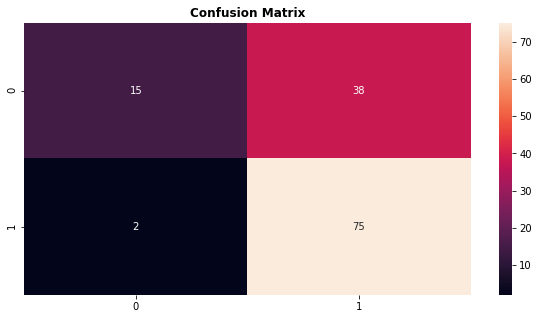

In [11]:
# Confusion Matrix

plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.title("Confusion Matrix",fontweight="bold")
plt.show()

In [12]:
# Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.28      0.43        53
           1       0.66      0.97      0.79        77

    accuracy                           0.69       130
   macro avg       0.77      0.63      0.61       130
weighted avg       0.75      0.69      0.64       130

